<p align='center'>
  <img width='400' height='170' src='https://raw.githubusercontent.com/isalesp/IPCC/4fb526533a06318281ec87d5fa7ec794a28a54b4/5715CA14-E932-477F-9234-E6C87EB8D33B.png'>
</p> 


#**IPCC - Climate Change 2022: Mitigation of Climate Change.**

## Summary for Policymakers

## Introduction

The Intergovernmental Panel on Climate Change (IPCC) is the UN body for assessing the science related to climate change. It was established by the United Nations Environment Programme (UNEP) and the World Meteorological Organization (WMO) in 1988 to provide political leaders with periodic scientific assessments concerning climate change, its implications and risks, as well as to put forward adaptation and mitigation strategies. In the same year the UN General Assembly endorsed the action by the WMO and UNEP in jointly establishing the IPCC. It has 195 member states.

The IPCC has three working groups: Working Group I, dealing with the physical science basis of climate change; Working Group II, dealing with impacts, adaptation and vulnerability; and Working Group III, dealing with the mitigation of climate change. 

IPCC assessments provide governments, at all levels, with scientific information that they can use to develop climate policies. IPCC assessments are a key input into the international negotiations to tackle climate change. IPCC reports are drafted and reviewed in several stages, thus guaranteeing objectivity and transparency.

Recently the IPCC worked on the Sixth Assessment Report which contains 3 parts. The first, released in August 2021, showed that unless there are immediate, rapid and large-scale reductions in greenhouse gas emissions, limiting warming to close to 1.5°C to 2°C will be beyond reach. In February 2022, the second report told us that human-induced climate change is causing dangerous and widespread disruption in nature. It is affecting the lives of billions around the world and the window for action is narrowing. And finally, the third report of IPCC’s Sixth Assessment Report on climate change mitigation assessing options & solutions for reducing greenhouse gas emissions was released on April 4.

In this short project we will creat a wordcloud from the third part of the Sixth Assessment Report, titled 'Climate Change 2022: Mitigation of Climate Change'. This wordcloud will show which are the words that have more occurrences in the document. 

## Environment

Let's begin by preparing our environment. For this project we will use `PyPDF2`, `wordcloud`, `numpy`, `PIL` and `matplotlib`.

In [ ]:
!pip install PyPDF2 
!pip install wordcloud

     |████████████████████████████████| 80 kB 4.9 MB/s 


In [ ]:
from PyPDF2 import PdfFileReader
from pathlib import Path 
from wordcloud import WordCloud, STOPWORDS
import numpy as np  
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

Before we can creat our worcloud, we need to convert our pdf document into txt. We start by reading our pdf file with `PdfFileReader` and store it into the variable `pdfreader`.

In [ ]:
pdfreader= PdfFileReader('IPCC.pdf')

Then we creat a `for loop` to iterate over each page in our variable pdfreader which contains the pdf file. For every time the loop iterates, it will extract the text of the current page using `extractText` and add it to the variable text, which we initially set as empty. Finally, with `Path` we creat the document in our directory as a txt file named rawtext.

In [ ]:
with Path('rawtext.txt').open(mode= 'w') as output_file:
  text= ''
  for page in pdfreader.pages:
    text += page.extractText()
  output_file.write(text)

Now that we have our document in a txt format we store it into a new variable called `doc`. 

In [ ]:
doc = open('rawtext.txt').read()

Here we are going some steps ahead and we will define the stopwords we do not want to be consider in our wordcloud. Initially we have set stopwords including only the words that come with `STOPWORDS` but then we add new words that are in the list below.

In [ ]:
stopwords = ['footnote', 'AR6', 'IPCC', 'Table',
             'Summary', 'II', 'Policymakers','edit', 'co py', 
             'based', 'Box Chapter', 'Chapter Box', 'option', 'ar',
             'approved', 'Figure', 'Subject', 'include', 'SPM', 'Py',
             'ag es', 'th', 'tal', 'co ag', 'from', 'including',
             ]+ list(STOPWORDS)


We want that our wordcloud have the apperance of the continents in the world so we use a mask. This mask is store in the variable world_mask that we can read using `numpy` and `PIL`.

In [ ]:
world_mask = np.array(Image.open('world.png'))

Inside the variable `ipcc` we creat an object with `WordCloud` which have a background color white, the stopwords we previously defined and our world_mask. Then, to our ipcc wordcloud object we apply the method `generate` using the text in the variable doc. 

In [ ]:
ipcc = WordCloud(
     background_color='white',
     stopwords=stopwords,
     mask= world_mask)

ipcc.generate(doc)

To display our wordcloud we use `matplotlib` and save it as a png.

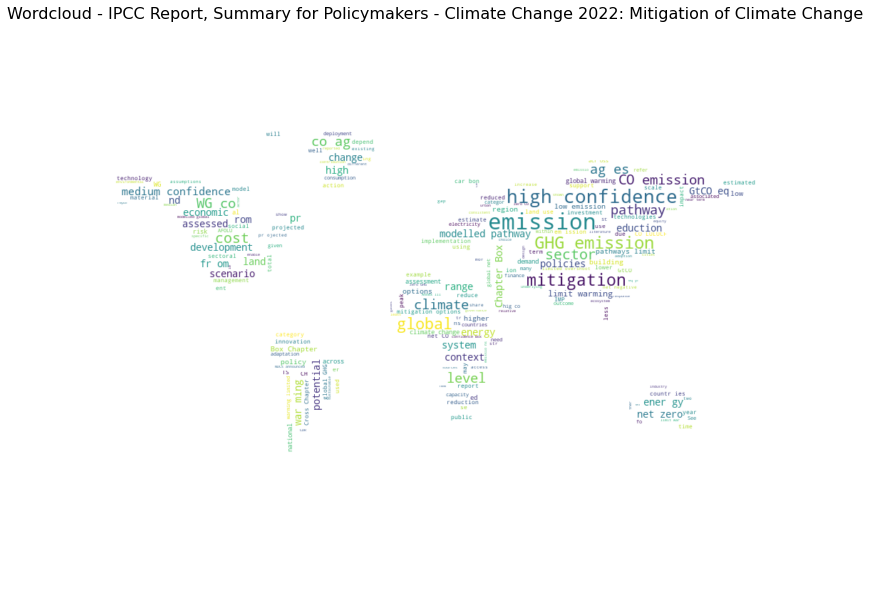

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(ipcc, interpolation='bilinear')
plt.title('Wordcloud - IPCC Report, Summary for Policymakers - Climate Change 2022: Mitigation of Climate Change', fontsize= 16)
plt.axis('off')
plt.savefig('ipcc_cloud.png', dpi= 300)
plt.show()

# **References**

The Intergovernmental Panel on Climate Change, https://www.ipcc.ch 

Author: Irais Saldivar

www.linkedin.com/in/irais-saldivar